# Solve Any Data Analysis Problem

## Chapter 4 - Project 3: What is the "best" product?

The files for this chapter are too large for GitHub.

You can find the files here: https://drive.google.com/drive/folders/1erkXubarDYi76k8xcJcufdvw9PTC8M5s?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploration

In [2]:
november = pd.read_csv("./data/november.csv.gz")
december = pd.read_csv("./data/december.csv.gz")

In [3]:
events = pd.concat([november, december], axis=0, ignore_index=True)
print(events.shape)

events.head()

(7033125, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a
1,2019-11-01 00:00:41 UTC,purchase,13200605,2053013557192163841,furniture.bedroom.bed,NaN,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
2,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
3,2019-11-01 00:03:24 UTC,cart,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
4,2019-11-01 00:03:39 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e


### Sanity checks

In [4]:
events.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code         0
brand            395108
price                 0
user_id               0
user_session         27
dtype: int64

In [5]:
events["event_time"] = pd.to_datetime(events["event_time"], format="%Y-%m-%d %H:%M:%S %Z")

events["event_time"].agg(["min", "max"])

min   2019-11-01 00:00:14+00:00
max   2019-12-31 23:59:09+00:00
Name: event_time, dtype: datetime64[ns, UTC]

Do we have any gaps in the dates?

In [6]:
(
    events
    .assign(month=events["event_time"].dt.month,
            day=events["event_time"].dt.day)
    .groupby("month")
    ["day"]
    .nunique()
)

month
11    30
12    31
Name: day, dtype: int64

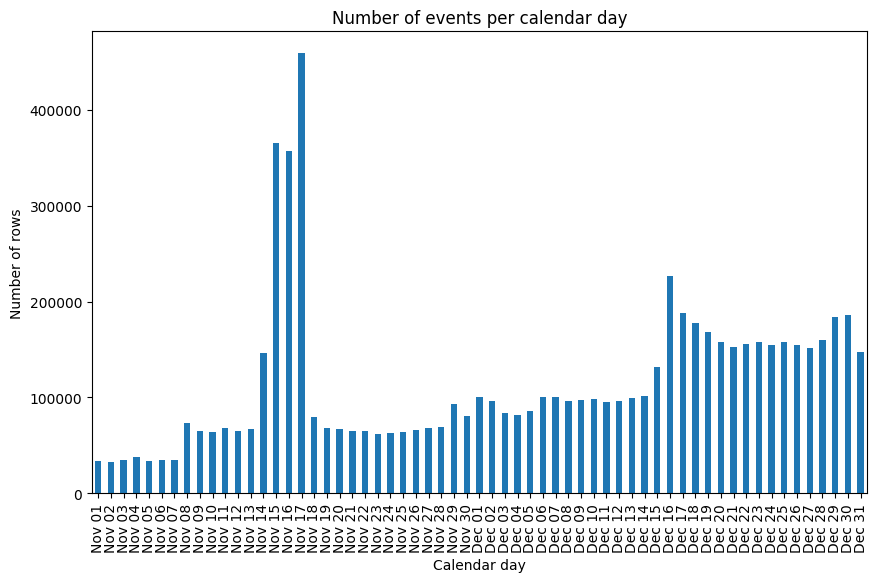

In [7]:
fig, axis = plt.subplots(figsize=(10, 6))

(
    events
    .assign(month=events["event_time"].dt.month,
            day=events["event_time"].dt.day)
    .groupby(["month", "day"])
    .size()
    .plot
    .bar(ax=axis)
)

labels = (
    pd.date_range(
        events["event_time"].dt.date.min(),
        events["event_time"].dt.date.max(),
        freq="D")
    .strftime("%b %d")
)

axis.set(title="Number of events per calendar day",
         xlabel="Calendar day",
         ylabel="Number of rows",
         xticklabels=labels)

plt.show()

There are definitely some days with much more data than others. With more context we'd know whether these are particular sale days or strange artifacts in the data. 17th November 2019 wasn't officially Black Friday but could have been a similar sale day for example.

In [8]:
events["event_type"].value_counts(dropna=False)

cart        5276372
purchase    1756753
Name: event_type, dtype: int64

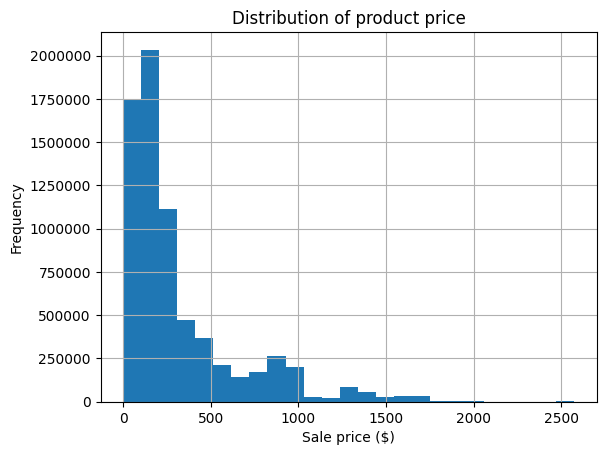

In [9]:
fig, axis = plt.subplots()

(
    events["price"]
    .hist(bins=25, ax=axis)
)

# disable scientific notation
axis.ticklabel_format(useOffset=False, style='plain')

axis.set(title="Distribution of product price",
         xlabel="Sale price ($)",
         ylabel="Frequency")

plt.show()

In [10]:
events["brand"].value_counts().head(10)

samsung    1756284
apple      1368364
xiaomi      722125
huawei      263155
oppo        128661
lg          123581
sony         78615
artel        72124
lucente      69998
lenovo       59700
Name: brand, dtype: int64

Do product IDs match to the same category every time?

In [11]:
(
    events
    .groupby("product_id")
    ["category_code"]
    .nunique()
    .loc[lambda x: x > 1]
    .sort_values(ascending=False)
)

product_id
1000978      2
13900087     2
13900049     2
13900054     2
13900055     2
            ..
5701183      2
5701186      2
5701190      2
5701192      2
100028003    2
Name: category_code, Length: 12884, dtype: int64

That's nearly 13,000 product IDs attached to multiple codes!

In [12]:
events["category_code"].value_counts().head(10)

construction.tools.light            1823398
electronics.smartphone              1577185
electronics.audio.headphone          240308
electronics.clocks                   233198
sport.bicycle                        231644
apparel.shoes                        212586
appliances.kitchen.refrigerators     190523
appliances.personal.massager         185601
appliances.environment.vacuum        170290
appliances.kitchen.washer            170121
Name: category_code, dtype: int64

There are a lot of construction tools, which seems... odd.

In [13]:
events[events["category_code"] == "construction.tools.light"].sample(10, random_state=42)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2956496,2019-12-01 14:19:49+00:00,cart,1005284,2232732093077520756,construction.tools.light,samsung,2562.49,561865826,5480ea00-a5d9-4cb8-89a8-fb1143bba6eb
6467629,2019-12-28 14:09:22+00:00,cart,1004857,2232732093077520756,construction.tools.light,samsung,128.32,593882984,e565e932-0d96-4bd6-b6da-4ec4ce95403b
4173392,2019-12-14 11:19:41+00:00,cart,1003910,2232732093077520756,construction.tools.light,nokia,127.92,524880802,c0df4eb8-7d3a-454d-88f8-1d23af1ce3a8
5065153,2019-12-19 14:40:21+00:00,cart,1005160,2232732093077520756,construction.tools.light,xiaomi,183.76,589406502,837f7746-77e7-4b90-8b79-752157a245cb
4576741,2019-12-16 21:29:41+00:00,cart,1005100,2232732093077520756,construction.tools.light,samsung,138.23,579633208,06bcd26b-56e3-4edb-8d44-6a8a86ea259f
4283065,2019-12-15 11:59:48+00:00,cart,1005211,2232732093077520756,construction.tools.light,samsung,162.16,576228375,168ca44b-8ecb-415a-9c5a-0968d385942b
3741431,2019-12-10 05:08:09+00:00,cart,1002544,2232732093077520756,construction.tools.light,apple,498.85,584578244,d0346c17-25a5-4648-9550-a71b06ac818d
6981201,2019-12-31 10:55:21+00:00,cart,1005141,2232732093077520756,construction.tools.light,apple,1593.06,595225457,febc0cd4-b625-4206-bf5f-87e607a7736e
6626408,2019-12-29 12:17:22+00:00,cart,1004858,2232732093077520756,construction.tools.light,samsung,136.14,523882321,704c1de7-c7f3-4704-8ea2-96fc0dffab63
3057975,2019-12-02 14:50:52+00:00,cart,1003712,2232732093077520756,construction.tools.light,samsung,512.24,540463048,6837637b-8da1-48e6-b910-dec318b8a396


These are probably smartphones?

In [14]:
(
    events
    .loc[events["category_code"] == "construction.tools.light", "brand"]
    .value_counts()
    .head(10)
)

samsung    727599
apple      521481
xiaomi     304546
huawei     149347
oppo        68446
vivo        10709
meizu        9093
honor        4389
nokia        3231
omron        3003
Name: brand, dtype: int64

We don't have a lot of information, but most of these are phone manufacturers so probably miscategorised.

What we could do is in cases where a product ID has two categories, take the **other** one and use that everywhere.

In [15]:
dupe_product_ids = (
    events
    .groupby("product_id")
    ["category_code"]
    .nunique()
    .loc[lambda x: x > 1]
    .index
    .values
)

dupe_product_ids[:10]

array([1000978, 1001588, 1001618, 1001619, 1002098, 1002100, 1002101,
       1002225, 1002367, 1002482], dtype=int64)

In [16]:
(
    events.loc[events["product_id"] == 1001588,
               "category_code"]
    .value_counts()
)

construction.tools.light    50
electronics.smartphone      22
Name: category_code, dtype: int64

In [17]:
def get_correct_category_code(product_id_rows):
    # product_id_rows is all rows for a given product ID
    # so we can find the two categories associated with this ID
    categories = product_id_rows["category_code"].value_counts()
    
    # if one is construction.tools.light, return the other one
    if "construction.tools.light" in categories.index:
        return categories.index.drop("construction.tools.light").values[0]
    # otherwise return the majority category
    else:
        return categories.index[0]

corrected_categories = (
    events[events["product_id"].isin(dupe_product_ids)]
    .groupby("product_id")
    .apply(get_correct_category_code)
    .reset_index(name="corrected_category")
)

corrected_categories.head()

,product_id,corrected_category
0,1000978,electronics.smartphone
1,1001588,electronics.smartphone
2,1001618,electronics.smartphone
3,1001619,electronics.smartphone
4,1002098,electronics.smartphone


Join this to the original data and overwrite the subcategory where this column doesn't match the original subcategory

In [18]:
events = events.merge(corrected_categories, on="product_id", how="left")
events.loc[events["corrected_category"].notnull(), "category_code"] = \
    events.loc[events["corrected_category"].notnull(), "corrected_category"]

events["category_code"].value_counts()

electronics.smartphone              3350680
sport.bicycle                        384120
appliances.personal.massager         254300
electronics.clocks                   228546
appliances.kitchen.refrigerators     214637
                                     ...   
apparel.skirt                           261
construction.tools.soldering            200
sport.diving                            144
computers.components.sound_card         118
auto.accessories.light                   41
Name: category_code, Length: 134, dtype: int64

That's more like it!!

In [19]:
events.drop(columns=["corrected_category"], inplace=True)

Let's now extract the "parent" category from the category_code

In [20]:
events["category"] = events["category_code"].str.split(".").str[0]

events = events.rename(columns={"category_code": "subcategory"})

events.head()

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,category
0,2019-11-01 00:00:14+00:00,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,electronics
1,2019-11-01 00:00:41+00:00,purchase,13200605,2053013557192163841,furniture.bedroom.bed,NaN,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a,furniture
2,2019-11-01 00:01:04+00:00,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,electronics
3,2019-11-01 00:03:24+00:00,cart,1801881,2053013554415534427,appliances.personal.massager,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,appliances
4,2019-11-01 00:03:39+00:00,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,electronics


In [21]:
events["category"].value_counts()

electronics     3908916
appliances      1250149
apparel          540955
sport            439029
computers        291790
furniture        216264
construction     144637
kids              98236
auto              89079
accessories       39350
country_yard       6106
medicine           5616
stationery         2998
Name: category, dtype: int64

Let's do the same "fix" for brands.

- for each product ID calculate the majority (non-null) brand
- fill NA values with that majority value
- overwrite other brands with majority value

In [22]:
duplicated_brands = (
    events
    .assign(brand = events["brand"].fillna("No brand")) # nunique doesn't count "NaN" values!
    .groupby("product_id")
    ["brand"]
    .nunique()
    .loc[lambda x: x > 1]
    .index
)

print(len(duplicated_brands))

duplicated_brands[:10]

1245


Int64Index([1001618, 1002310, 1002786, 1002877, 1003080, 1003224, 1003238,
            1003330, 1003604, 1003851],
           dtype='int64', name='product_id')

In [23]:
def get_correct_brand(product_id_rows):
    # product_id_rows is all rows for a given product ID
    # so we can find the brands associated with this ID
    # value_counts will give us only non-NA values
    brand_counts = product_id_rows["brand"].value_counts(dropna=False)
    
    if isinstance(brand_counts.index[0], str):
        # no NULLs, just return the majority brand
        return brand_counts.index[0]
    
    # now if np.NaN is the only value, return it
    if len(brand_counts) == 1:
        return np.nan
    
    # otherwise return the second value (the majority non-null value)
    return brand_counts.index[1]

corrected_brands = (
    events[events["product_id"].isin(duplicated_brands)]
    .groupby("product_id")
    .apply(get_correct_brand)
    .reset_index(name="corrected_brand")
)

corrected_brands.head()

,product_id,corrected_brand
0,1001618,apple
1,1002310,lg
2,1002786,apple
3,1002877,samsung
4,1003080,huawei


Join this to the original data and overwrite the brand where this column doesn't match the original brand

In [24]:
events = events.merge(corrected_brands, on="product_id", how="left")
events.loc[events["corrected_brand"].notnull(), "brand"] = \
    events.loc[events["corrected_brand"].notnull(), "corrected_brand"]

Now verify that a product ID matches only ONE brand + category combo (let's not try to fix category ID and just ignore it)

In [25]:
assert (
    len(events[["product_id", "category", "subcategory", "brand"]]
        .drop_duplicates())
    ==
    events["product_id"].nunique()
)

In [26]:
events.drop(columns=["corrected_brand"], inplace=True)

Finally create the product name (again, should be unique for each product ID)

In [27]:
def get_product_name(row):
    brand = ""
    
    # only include brand if it's available
    if isinstance(row["brand"], str):
        brand = row["brand"]
    
    return f"{str(row['product_id'])} - {brand} {row['subcategory']}" 

events["product_name"] = events.apply(get_product_name, axis=1)

events.head()

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,category,product_name
0,2019-11-01 00:00:14+00:00,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,electronics,1005014 - samsung electronics.smartphone
1,2019-11-01 00:00:41+00:00,purchase,13200605,2053013557192163841,furniture.bedroom.bed,NaN,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a,furniture,13200605 - furniture.bedroom.bed
2,2019-11-01 00:01:04+00:00,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,electronics,1005161 - xiaomi electronics.smartphone
3,2019-11-01 00:03:24+00:00,cart,1801881,2053013554415534427,appliances.personal.massager,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,appliances,1801881 - samsung appliances.personal.massager
4,2019-11-01 00:03:39+00:00,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,electronics,1005115 - apple electronics.smartphone


### Save the modified data for later!

The above operations take a while so save a modified copy we can return to later.

We can then start the notebook from here next time to avoid waiting.

In [28]:
events.to_parquet("./data/events.parquet.gz", compression="gzip")

# Part 2 (reading in pre-processed data) starts here

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
events = pd.read_parquet("./data/events.parquet.gz")

Split out by purchases and "cart" events too

In [31]:
events["event_type"].value_counts()

cart        5276372
purchase    1756753
Name: event_type, dtype: int64

In [32]:
purchases = events[events["event_type"] == "purchase"].copy()
carts = events[events["event_type"] == "cart"].copy()

In [33]:
assert len(purchases) + len(carts) == len(events)

## Build a "league table" of metrics

- by volume sold (monthly)
- by total revenue (monthly)
- by number of unique users purchased (monthly)
- changes for the same product in November (to see which is the "best" product during Christmas)

These metrics only need the purchases data, but for conversion we'll need "cart" events too so we'll join that metric on separately.

In [34]:
purchases_league_table = (
    purchases
    .assign(
        november_count=np.where(purchases["event_time"].dt.month==11, 1, 0),
        november_revenue=np.where(purchases["event_time"].dt.month==11, purchases["price"], 0),
        november_user_id=np.where(purchases["event_time"].dt.month==11, purchases["user_id"], np.nan),
        december_count=np.where(purchases["event_time"].dt.month==12, 1, 0),
        december_revenue=np.where(purchases["event_time"].dt.month==12, purchases["price"], 0),
        december_user_id=np.where(purchases["event_time"].dt.month==12, purchases["user_id"], np.nan))
    .groupby(["product_id", "product_name"])
    .agg(november_volume=('november_count', 'sum'),
         november_revenue=('november_revenue', 'sum'),
         november_users=('november_user_id', 'nunique'),
         december_volume=('december_count', 'sum'),
         december_revenue=('december_revenue', 'sum'),
         december_users=('december_user_id', 'nunique')
    )
    .assign(
        volume_diff=lambda x:
            x["december_volume"] - x["november_volume"],
        revenue_diff=lambda x:
            x["december_revenue"] - x["november_revenue"],
        users_diff=lambda x:
            x["december_users"] - x["november_users"])
    .reset_index()
)

purchases_league_table.head()

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff
0,1000978,1000978 - samsung electronics.smartphone,20,6135.32,17,16,4260.40,16,-4,-1874.92,-1
1,1001588,1001588 - meizu electronics.smartphone,6,766.29,5,13,1652.55,12,7,886.26,7
2,1001605,1001605 - apple electronics.smartphone,0,0.00,0,18,9806.76,16,18,9806.76,16
3,1001606,1001606 - apple electronics.smartphone,0,0.00,0,11,5662.69,10,11,5662.69,10
4,1001618,1001618 - apple electronics.smartphone,36,18059.76,25,7,4745.84,7,-29,-13313.92,-18


Conversion

In [35]:
conversion_table = (
    pd.pivot_table(
        data=events.assign(month=events["event_time"].dt.month),
        index=["product_id", "product_name"],
        columns=["month", "event_type"],
        values="user_session",
        aggfunc="count"
    )
    .fillna(0)
    .set_axis(labels=["november_cart", "november_sold", "december_cart", "december_sold"],
              axis=1)
    .reset_index()
    .assign(november_conversion=lambda x: x["november_sold"] / x["november_cart"],
            december_conversion=lambda x: x["december_sold"] / x["december_cart"])
)

conversion_table.head()

,product_id,product_name,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion
0,1000894,1000894 - texet electronics.smartphone,0.0,0.0,4.0,0.0,NaN,0.000000
1,1000978,1000978 - samsung electronics.smartphone,60.0,20.0,58.0,16.0,0.333333,0.275862
2,1001588,1001588 - meizu electronics.smartphone,16.0,6.0,37.0,13.0,0.375000,0.351351
3,1001605,1001605 - apple electronics.smartphone,0.0,0.0,42.0,18.0,NaN,0.428571
4,1001606,1001606 - apple electronics.smartphone,0.0,0.0,23.0,11.0,NaN,0.478261


In [36]:
league_table = purchases_league_table.merge(conversion_table, on=["product_id", "product_name"], how="left")
league_table.head()

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion
0,1000978,1000978 - samsung electronics.smartphone,20,6135.32,17,16,4260.40,16,-4,-1874.92,-1,60.0,20.0,58.0,16.0,0.333333,0.275862
1,1001588,1001588 - meizu electronics.smartphone,6,766.29,5,13,1652.55,12,7,886.26,7,16.0,6.0,37.0,13.0,0.375000,0.351351
2,1001605,1001605 - apple electronics.smartphone,0,0.00,0,18,9806.76,16,18,9806.76,16,0.0,0.0,42.0,18.0,NaN,0.428571
3,1001606,1001606 - apple electronics.smartphone,0,0.00,0,11,5662.69,10,11,5662.69,10,0.0,0.0,23.0,11.0,NaN,0.478261
4,1001618,1001618 - apple electronics.smartphone,36,18059.76,25,7,4745.84,7,-29,-13313.92,-18,69.0,36.0,17.0,7.0,0.521739,0.411765


Again check that product ID is still unique

In [37]:
assert len(league_table) == purchases["product_id"].nunique()

In [38]:
league_table.dtypes

product_id               int64
product_name            object
november_volume          int32
november_revenue       float64
november_users           int64
december_volume          int32
december_revenue       float64
december_users           int64
volume_diff              int32
revenue_diff           float64
users_diff               int64
november_cart          float64
november_sold          float64
december_cart          float64
december_sold          float64
november_conversion    float64
december_conversion    float64
dtype: object

So now we have a bunch of metrics in place. How do we "score" each product?

Depends what we care about!

- we could pick the one metric to sort the list by and just think of the top N products as "best"
- we could weight each metric by its relative importance to others and create a "weighted combination" of metric values
- if we care about best Christmas performers we could look at the distribution of one of the "diff" columns and see the positive outliers

Lots of options! As the brief was about the Christmas period, let's go for that latter option.

Which metric do we care about most?

- Which product brought in more revenue? Probably not, seeing as more expensive items will skew the figures
- Number of unique users that bought the product? Possibly
- Volume of sold items seems like a solid start
- Conversion is then something to look at afterwards

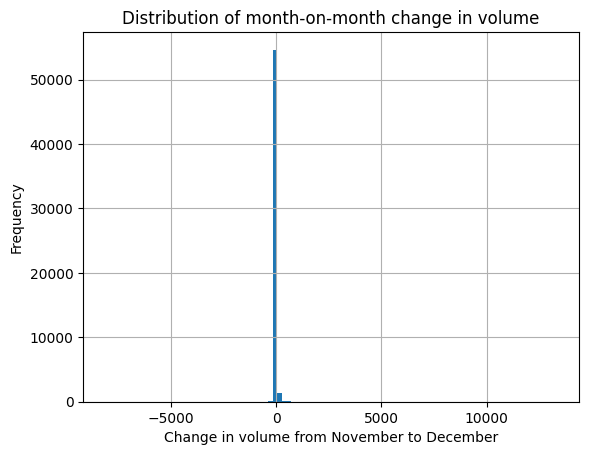

In [39]:
fig, axis = plt.subplots()

league_table["volume_diff"].hist(bins=100, ax=axis)

axis.set(title="Distribution of month-on-month change in volume",
         xlabel="Change in volume from November to December",
         ylabel="Frequency")

plt.show()

Most items haven't changed their behaviour much, let's zoom in to check

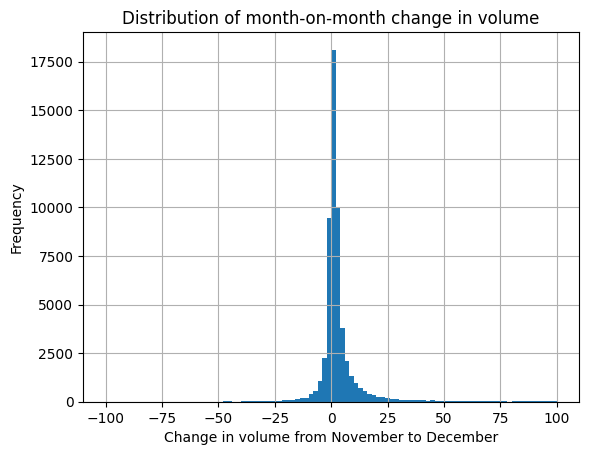

In [40]:
fig, axis = plt.subplots()

league_table.loc[league_table["volume_diff"].between(-100,100), "volume_diff"].hist(bins=100, ax=axis)

axis.set(title="Distribution of month-on-month change in volume",
         xlabel="Change in volume from November to December",
         ylabel="Frequency")

plt.show()

We really should be looking at percentage change so large-volume items don't skew the data

In [41]:
league_table["volume_diff_pct"] = (
    100 * (league_table["volume_diff"] / league_table["november_volume"])
)

(
    league_table
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .sort_values("volume_diff_pct", ascending=False).head()
)

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct
55,1002995,1002995 - apple electronics.smartphone,3,849.36,3,422,154804.17,318,419,153954.81,315,4.0,3.0,798.0,422.0,0.750000,0.528822,13966.666667
5523,3100883,3100883 - scarlett appliances.kitchen.blender,1,20.57,1,93,1444.36,86,92,1423.79,85,6.0,1.0,396.0,93.0,0.166667,0.234848,9200.000000
52266,100023495,100023495 - lenovo electronics.smartphone,1,617.52,1,71,40284.93,48,70,39667.41,47,7.0,1.0,238.0,71.0,0.142857,0.298319,7000.000000
72,1003141,1003141 - apple appliances.kitchen.refrigerators,1,382.97,1,69,19710.02,60,68,19327.05,59,16.0,1.0,153.0,69.0,0.062500,0.450980,6800.000000
304,1004157,1004157 - samsung electronics.smartphone,1,756.78,1,66,46380.08,60,65,45623.30,59,1.0,1.0,253.0,66.0,1.000000,0.260870,6500.000000


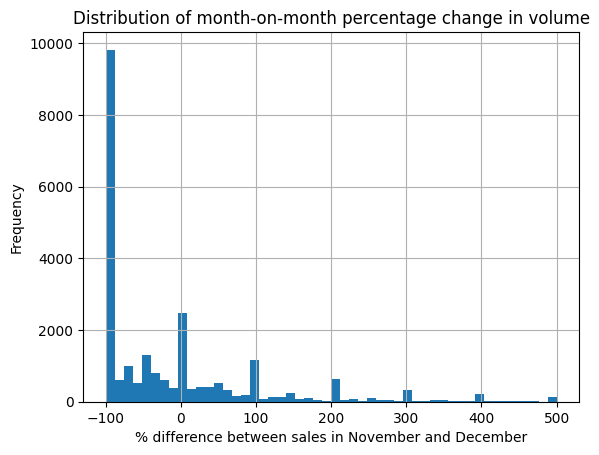

In [42]:
fig, axis = plt.subplots()

(
    league_table["volume_diff_pct"]
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .loc[lambda x: x.between(-101,501)]
    .hist(bins=50, ax=axis)
)

axis.set(
    title="Distribution of month-on-month percentage change in volume",
    xlabel="% difference between sales in November and December",
    ylabel="Frequency"
)

plt.show()

Let's extract a unique product lookup table to re-join to these metrics.

Product ID should be unique in this product catalog:

In [43]:
product_catalog = (
    events[["product_id", "product_name", "category_id", "subcategory", "brand", "category"]]
    .drop_duplicates(subset=["product_id", "product_name", "subcategory", "brand", "category"])
)

assert len(product_catalog) == events["product_id"].nunique()

print(product_catalog.shape)
product_catalog.head()

(83838, 6)


,product_id,product_name,category_id,subcategory,brand,category
0,1005014,1005014 - samsung electronics.smartphone,2053013555631882655,electronics.smartphone,samsung,electronics
1,13200605,13200605 - furniture.bedroom.bed,2053013557192163841,furniture.bedroom.bed,None,furniture
2,1005161,1005161 - xiaomi electronics.smartphone,2053013555631882655,electronics.smartphone,xiaomi,electronics
3,1801881,1801881 - samsung appliances.personal.massager,2053013554415534427,appliances.personal.massager,samsung,appliances
4,1005115,1005115 - apple electronics.smartphone,2053013555631882655,electronics.smartphone,apple,electronics


How do we look for our "best" performers?

- let's say anything that sold more than double in December vs. November, and at least 10 in November, gets counted
- and anything where we sold at least 100 in December but 0 in November (in this case the % change would be meaningless so we couldn't use it to filter)

In [44]:
DEC_VS_NOV_PCT_CUTOFF = 200
NOV_VOLUME_CUTOFF = 10
ONLY_DEC_VOLUME_CUTOFF = 100

december_high_performers = (
    pd.concat(
    [
        league_table[(np.isinf(league_table["volume_diff_pct"]) == False)
            & (league_table["november_volume"] > NOV_VOLUME_CUTOFF)
            & (league_table["volume_diff_pct"] > DEC_VS_NOV_PCT_CUTOFF)],
        league_table[(np.isinf(league_table["volume_diff_pct"]))
            & (league_table["december_volume"] > ONLY_DEC_VOLUME_CUTOFF)]
    ],
    axis=0,
    ignore_index=True)
    .merge(product_catalog.drop(columns="product_name"), on="product_id") # no need to include name as we have it
)

print(december_high_performers.shape)
december_high_performers.head()

(449, 22)


,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,...,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct,category_id,subcategory,brand,category
0,1002527,1002527 - apple electronics.smartphone,14,10086.08,14,455,303348.41,300,441,293262.33,...,14.0,1068.0,455.0,0.466667,0.426030,3150.000000,2053013555631882655,electronics.smartphone,apple,electronics
1,1003533,1003533 - samsung electronics.smartphone,123,53570.29,107,450,138198.78,340,327,84628.49,...,123.0,1081.0,450.0,0.275168,0.416281,265.853659,2053013555631882655,electronics.smartphone,samsung,electronics
2,1003712,1003712 - samsung electronics.smartphone,519,309958.00,406,1806,920216.77,1285,1287,610258.77,...,519.0,5430.0,1806.0,0.307282,0.332597,247.976879,2053013555631882655,electronics.smartphone,samsung,electronics
3,1003770,1003770 - huawei electronics.smartphone,11,3329.24,10,55,12116.08,48,44,8786.84,...,11.0,148.0,55.0,0.239130,0.371622,400.000000,2053013555631882655,electronics.smartphone,huawei,electronics
4,1003801,1003801 - apple electronics.smartphone,107,70989.71,89,333,208191.34,267,226,137201.63,...,107.0,833.0,333.0,0.384892,0.399760,211.214953,2053013555631882655,electronics.smartphone,apple,electronics


In [45]:
from IPython.display import display

for col in ["category", "subcategory", "brand"]:
    print(col)
    display(december_high_performers[col].value_counts())
    print("==============================\n")

category


apparel         121
appliances      102
electronics      85
computers        36
furniture        32
kids             24
construction     20
sport            13
auto              8
country_yard      4
medicine          2
accessories       1
stationery        1
Name: category, dtype: int64


subcategory


electronics.smartphone               43
apparel.shoes                        37
appliances.kitchen.coffee_grinder    33
apparel.shoes.sandals                28
appliances.personal.massager         26
                                     ..
electronics.audio.microphone          1
apparel.shoes.ballet_shoes            1
kids.dolls                            1
appliances.personal.hair_cutter       1
stationery.cartrige                   1
Name: subcategory, Length: 76, dtype: int64


brand


lucente    56
xiaomi     31
sony       24
samsung    20
huawei     18
           ..
babyzen     1
palit       1
galaxy      1
gorenje     1
saeshin     1
Name: brand, Length: 128, dtype: int64

In [46]:
december_high_performers[["category", "subcategory", "brand"]].value_counts().head(10)

category     subcategory                        brand  
appliances   appliances.kitchen.coffee_grinder  lucente    33
electronics  electronics.smartphone             xiaomi     12
apparel      apparel.shoes                      sony       11
kids         kids.toys                          lucente    10
electronics  electronics.smartphone             huawei      9
                                                samsung     8
apparel      apparel.shoes                      lg          7
computers    computers.peripherals.printer      lucente     7
furniture    furniture.kitchen.chair            xiaomi      6
electronics  electronics.smartphone             apple       6
dtype: int64

Looks like various shoes, smartphones, coffee grinders, and clocks all had upticks in December vs. November.

#### An alternative view

Let's now look at best products in terms of conversion.

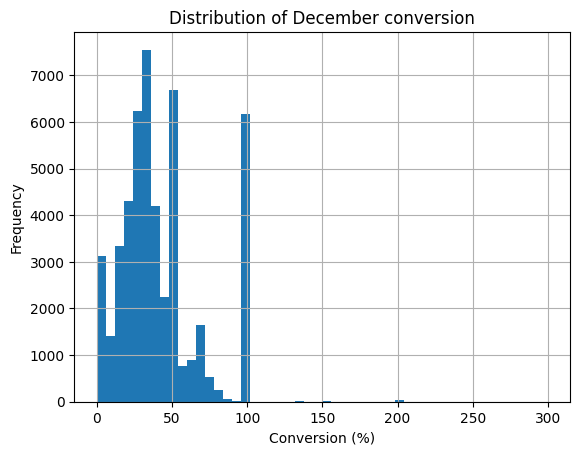

In [47]:
fig, axis = plt.subplots()

(
    league_table[(np.isinf(league_table["december_conversion"]) == False)
                 & (np.isnan(league_table["december_conversion"]) == False)]
    ["december_conversion"]
    .mul(100)
    .hist(bins=50, ax=axis)
)

axis.set(
    title="Distribution of December conversion",
    xlabel="Conversion (%)",
    ylabel="Frequency"
)

plt.show()

Some fun data issues like >100% conversion aside (we're either missing cart events or they happened in November if the purchase happened on the 1st December just after midnight) it looks like quite a high conversion rate from cart -> purchase, which makes sense.

Let's look at the top performers (data errors included):

In [48]:
(
    league_table[(np.isinf(league_table["december_conversion"]) == False)
                 & (np.isnan(league_table["december_conversion"]) == False)
                 & (league_table["december_conversion"] > 0.99)]
    .sort_values("december_conversion", ascending=False)
    .head(20)
)

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct
17517,9200694,9200694 - apparel.scarf,0,0.00,0,3,254.82,1,3,254.82,1,0.0,0.0,1.0,3.0,NaN,3.0,inf
46637,44700039,44700039 - apparel.shirt,0,0.00,0,2,111.72,2,2,111.72,2,0.0,0.0,1.0,2.0,NaN,2.0,inf
32318,21410218,21410218 - orient electronics.clocks,4,646.60,4,2,323.30,2,-2,-323.30,-2,10.0,4.0,1.0,2.0,0.400000,2.0,-50.0
25735,17200764,17200764 - furniture.living_room.sofa,4,4931.92,3,2,2465.96,1,-2,-2465.96,-2,6.0,4.0,1.0,2.0,0.666667,2.0,-50.0
54792,100044324,100044324 - premont accessories.bag,0,0.00,0,2,169.84,1,2,169.84,1,0.0,0.0,1.0,2.0,NaN,2.0,inf
50955,100015261,100015261 - blackbox electronics.clocks,0,0.00,0,2,543.60,2,2,543.60,2,0.0,0.0,1.0,2.0,NaN,2.0,inf
17280,9101658,9101658 - asus furniture.kitchen.table,0,0.00,0,2,71.56,2,2,71.56,2,2.0,0.0,1.0,2.0,0.000000,2.0,inf
37768,26403333,26403333 - computers.peripherals.printer,0,0.00,0,2,137.46,2,2,137.46,2,0.0,0.0,1.0,2.0,NaN,2.0,inf
15242,7300445,7300445 - kingston appliances.personal.massager,0,0.00,0,2,197.68,1,2,197.68,1,0.0,0.0,1.0,2.0,NaN,2.0,inf
54809,100044387,100044387 - sokolov sport.ski,0,0.00,0,2,26.00,1,2,26.00,1,0.0,0.0,1.0,2.0,NaN,2.0,inf


Let's look at the top one of those:

In [49]:
events[(events["product_id"] == 9200694) & (events["event_time"].dt.month == 12)]

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,category,product_name
4698592,2019-12-17 13:01:28+00:00,cart,9200694,2232732104343421549,apparel.scarf,None,84.94,513304382,ecb28e2c-525d-4adb-998e-fd589d66ca86,apparel,9200694 - apparel.scarf
4698610,2019-12-17 13:01:38+00:00,purchase,9200694,2232732104343421549,apparel.scarf,None,84.94,513304382,ecb28e2c-525d-4adb-998e-fd589d66ca86,apparel,9200694 - apparel.scarf
5124731,2019-12-20 04:04:58+00:00,purchase,9200694,2232732104343421549,apparel.scarf,None,84.94,513304382,d607a412-9e1c-4ab4-89be-b4dd3fe8def1,apparel,9200694 - apparel.scarf
5192399,2019-12-20 10:56:30+00:00,purchase,9200694,2232732104343421549,apparel.scarf,None,84.94,513304382,935b176b-19ee-47f1-8332-1144e970c495,apparel,9200694 - apparel.scarf


That's the same user buying the same scarf 3 times after having it in their cart once. Possible theories:

- data error (missing cart events for 2 purchases)
- the platform allows users to re-purchase something they've already bought from, say, an "orders" page (hence no cart event)

Either way, an inflated conversion figure. Let's look at top performers under 100% conversion and with at least 2 users:

In [50]:
(
    league_table[(np.isinf(league_table["december_conversion"]) == False)
                 & (np.isnan(league_table["december_conversion"]) == False)
                 & (league_table["december_conversion"] <= 1)
                 & (league_table["december_users"] > 1)]
    .sort_values("december_conversion", ascending=False)
    .head(20)
)

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct
56281,100063282,100063282 - sokolov construction.components.fa...,0,0.00,0,3,336.00,2,3,336.00,2,0.0,0.0,3.0,3.0,NaN,1.0,inf
20756,12202338,12202338 - torrent sport.bicycle,4,463.24,3,3,347.43,2,-1,-115.81,-1,15.0,4.0,3.0,3.0,0.266667,1.0,-25.000000
45276,36000005,36000005 - vinzer apparel.shoes,1,48.65,1,2,95.86,2,1,47.21,1,2.0,1.0,2.0,2.0,0.500000,1.0,100.000000
20797,12202504,12202504 - trinx sport.bicycle,0,0.00,0,2,314.04,2,2,314.04,2,0.0,0.0,2.0,2.0,NaN,1.0,inf
45263,35900037,35900037 - wellberg apparel.shoes,0,0.00,0,2,30.79,2,2,30.79,2,0.0,0.0,2.0,2.0,NaN,1.0,inf
30191,21400406,21400406 - boccia electronics.clocks,0,0.00,0,2,205.92,2,2,205.92,2,3.0,0.0,2.0,2.0,0.000000,1.0,inf
45220,35200685,35200685 - visavis apparel.shoes.moccasins,1,7.79,1,2,15.58,2,1,7.79,1,0.0,1.0,2.0,2.0,inf,1.0,100.000000
20776,12202408,12202408 - mongoose sport.bicycle,0,0.00,0,3,587.67,3,3,587.67,3,21.0,0.0,3.0,3.0,0.000000,1.0,inf
30258,21400634,21400634 - orient electronics.clocks,1,118.15,1,2,255.86,2,1,137.71,1,1.0,1.0,2.0,2.0,1.000000,1.0,100.000000
30317,21400844,21400844 - casio electronics.clocks,0,0.00,0,5,787.65,2,5,787.65,2,1.0,0.0,5.0,5.0,0.000000,1.0,inf


Still quite low number of users and purchases, let's set some higher boundaries on those:

In [51]:
MIN_USERS = 5
MIN_PURCHASES = 10
CONVERSION_LOWER_LIMIT = 0.7

best_december_converters = (
    league_table[(np.isinf(league_table["december_conversion"]) == False)
             & (np.isnan(league_table["december_conversion"]) == False)
             & (league_table["december_conversion"].between(CONVERSION_LOWER_LIMIT, 1))
             & (league_table["december_users"] > MIN_USERS)
             & (league_table["december_sold"] > MIN_PURCHASES)]
    .sort_values("december_conversion", ascending=False)
    .merge(product_catalog.drop(columns=["product_name"]), on=["product_id"]) # again don't need product name twice
)

print(best_december_converters.shape)
best_december_converters.head()

(55, 22)


,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,...,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct,category_id,subcategory,brand,category
0,26403438,26403438 - rusgoldart computers.peripherals.pr...,0,0.00,0,12,1000.80,9,12,1000.80,...,0.0,12.0,12.0,NaN,1.000000,inf,2053013553056579841,computers.peripherals.printer,rusgoldart,computers
1,14100671,14100671 - yamaha electronics.audio.acoustic,1,428.30,1,22,9422.60,6,21,8994.30,...,1.0,24.0,22.0,0.25000,0.916667,2100.000000,2053013557670314521,electronics.audio.acoustic,yamaha,electronics
2,26205367,26205367 - construction.components.faucet,0,0.00,0,12,2920.54,10,12,2920.54,...,0.0,14.0,12.0,NaN,0.857143,inf,2232732081585127530,construction.components.faucet,None,construction
3,1307068,1307068 - lenovo computers.notebook,11,3338.28,9,12,3641.76,10,1,303.48,...,11.0,14.0,12.0,0.37931,0.857143,9.090909,2053013558920217191,computers.notebook,lenovo,computers
4,2200061,2200061 - sony furniture.bedroom.blanket,0,0.00,0,11,2404.07,9,11,2404.07,...,0.0,13.0,11.0,NaN,0.846154,inf,2232732101919113783,furniture.bedroom.blanket,sony,furniture


Those limits clear out 100% conversion figures, which leave us with the "best converters" (but only 55 products are above our arbitrary threshold of 70% conversion).

In [52]:
best_december_converters["category"].value_counts()

furniture       9
construction    8
computers       7
appliances      7
electronics     6
kids            6
apparel         6
auto            3
sport           2
accessories     1
Name: category, dtype: int64

In [53]:
best_december_converters.loc[best_december_converters["category"].isin(["furniture", "construction"]), "subcategory"].value_counts()

construction.components.faucet    6
furniture.bedroom.bed             3
construction.tools.drill          2
furniture.bathroom.bath           2
furniture.bedroom.blanket         1
furniture.kitchen.table           1
furniture.universal.light         1
furniture.living_room.sofa        1
Name: subcategory, dtype: int64

Which product is "best" and where do we go from here?

- "best" clearly doesn't have a single answer. All of the above answers would change if we changed our cutoff values for example
- we don't have enough data to compare beyond November. Maybe that's a quiet month and differences in volumes aren't just due to Christmas performance
- a more sophisticated method would be to forecast volumes for December and see which product outperformed its "expected" sales in December

Plenty of avenues to explore further after an initial discussion with our stakeholder!